# Foundations of Artificial Intelligence and Machine Learning
## A Program by IIIT-H and TalentSprint

#### To be done in the Lab

In this experiment, we will see a simple data set which we will use for a kNN problem. We will read the data from a csv file using pandas and visualize it using matplotlib. The actual kNN computations are done in the next Experiment.

The objectives for this experiment are:
 * getting comfortable with Jupyter
 * getting familiar with pandas
 * getting familiar with matplotlib
 
To know more about pandas refer to:
 * The pandas Tutorial video in the Python Course in the LMS
 * The data munging Tutorial video in the Python Course in the LMS
 * Of course pandas' documentation is great too

To know more about matplotlib refer to:
 * The matplotlib Tutorial video in the Python Course in the LMS


### The problem and the data

Let us consider a simple situation. Given some data about a fruit.

Fruits are characterized by 
 * weight (in grams)
 * colour as an integer
     - 1 $\rightarrow$ red
     - 2 $\rightarrow$ orange
     - 3 $\rightarrow$ yellow
     - 4 $\rightarrow$ green
     - 5 $\rightarrow$ blue
     - 6 $\rightarrow$ purple
 * label as a string
     - "Apple" or "Banana"
     
Here are the details of the file:
  * 00-fruits.csv $\Rightarrow$ The input data. 
  * Has 18 lines
  * The first line is the header line
  * Each line contains weight in grams, colour code, and string "Apple", or "Banana"
  

In [1]:
# Let us first set up the data file name
FRUITS = "AIML_DS_FRUITS_SAMPLE.csv"

In [2]:
# Let us first read the data from the file
import pandas as pd
data = pd.read_csv(FRUITS)
data

Weight  Colour   Label  Sphericity
0      303       4  Banana        0.60
1      370       1   Apple        0.20
2      298       3  Banana        0.65
3      277       3  Banana        0.70
4      377       4   Apple        0.25
5      299       3  Banana        0.75
6      382       1   Apple        0.30
7      374       4   Apple        0.40
8      303       4  Banana        0.80
9      309       3  Banana        0.85
10     359       1   Apple        0.45
11     366       4   Apple        0.50
12     311       3  Banana        0.90
13     302       3  Banana        0.95
14     373       4   Apple        0.35
15     312       4  Banana        0.95
16     277       4  Banana        1.00

Note that the nice display above is due to pandas and Jupyter working together. 

Let us convert the data values in the **Label** column: Apples as A and Bananas as B. Here is the pandas code to do that. 

*Note the defensive conversion to lower() as well as returning an X for wrong data. Real world data will rarely be clean. It is better to know that some data is wrong rather than arbitrarily classifying such data.*

In [3]:
def fruitLabels(s):
    s = s.strip().lower()
    if s == "apple":
        return "A"
    if s == "banana":
        return "B"
    return "X"
import pandas as pd
data = pd.read_csv(FRUITS, converters={"Label":fruitLabels})
data

Weight  Colour Label  Sphericity
0      303       4     B        0.60
1      370       1     A        0.20
2      298       3     B        0.65
3      277       3     B        0.70
4      377       4     A        0.25
5      299       3     B        0.75
6      382       1     A        0.30
7      374       4     A        0.40
8      303       4     B        0.80
9      309       3     B        0.85
10     359       1     A        0.45
11     366       4     A        0.50
12     311       3     B        0.90
13     302       3     B        0.95
14     373       4     A        0.35
15     312       4     B        0.95
16     277       4     B        1.00

Before we start doing anything else, let us do some exploration. Let us plot the weight and color distribution.

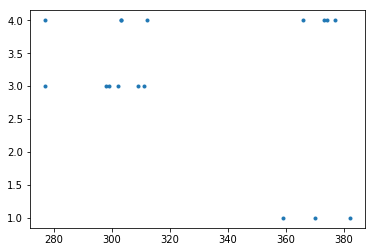

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(data.Weight, data.Colour, ".")
plt.show()
## ---------------------------------------------------------------------------------
## Sometimes you will not see the graph on executing a cell with matplotlib commands.
## Verify that show() command has been issued and if it has been
## re-execute the cell. That is press SHIFT-ENTER again
## ----------------------------------------------------------------------------------

But this is not very useful. So let us separate the data we have into apples and bananas and print them in different colours

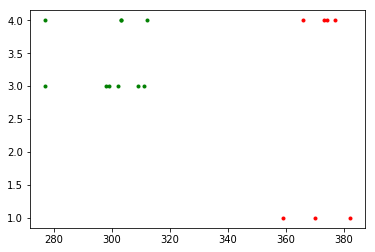

In [5]:
apples = data[data.Label == "A"]
bananas = data[data.Label == "B"]
plt.plot(apples.Weight, apples.Colour, "r.")
plt.plot(bananas.Weight, bananas.Colour, "g.")
plt.show()

Let us add some labels to make the chart better 

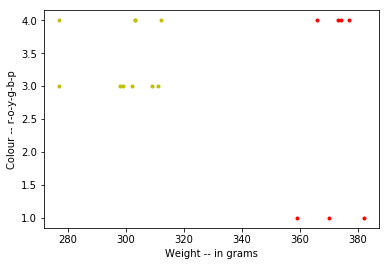

In [6]:
plt.plot(apples.Weight, apples.Colour, "r.")
plt.plot(bananas.Weight, bananas.Colour, "y.")
plt.xlabel("Weight -- in grams")
plt.ylabel("Colour -- r-o-y-g-b-p")
plt.show()

**Exercise 1** :: Change the points for Apples to big circles and the points for Bananas to crosses. Edit the areas marked with ??? in the code below.

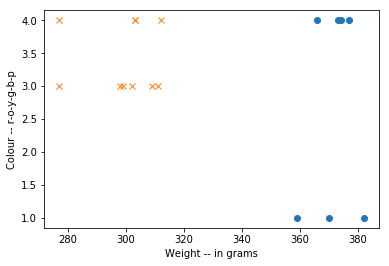

In [7]:
plt.plot(apples.Weight, apples.Colour, "o")
plt.plot(bananas.Weight, bananas.Colour, "x")
plt.xlabel("Weight -- in grams")
plt.ylabel("Colour -- r-o-y-g-b-p")
plt.show()

We  see that similar fruits come close in the weight, color space? Now let us plot two sample sample data in black.

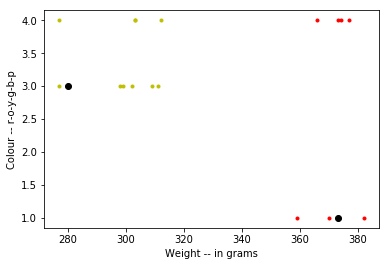

In [8]:
plt.plot(apples.Weight, apples.Colour, "r.")
plt.plot(bananas.Weight, bananas.Colour, "y.")
plt.xlabel("Weight -- in grams")
plt.ylabel("Colour -- r-o-y-g-b-p")
plt.plot([373, 280], [1, 3], "ko")
plt.show()

Now we can infer that the fruit (373, 1) is most likely to be an apple and the fruit (280, 3) is most probably a banana. 

The job for us now is to instead of eyeballing it one at a time like above, use a kNN classifier with different $k$ values, using different distance functions, to determine the correct label for some new data -- that is not in 00-fruits.csv

Let us first write a simple distance function to calculate the distance between two fruits.

In [9]:
import math
def dist(a, b):
    sqSum = 0
    for i in range(len(a)):
        sqSum += (a[i] - b[i]) ** 2
    return math.sqrt(sqSum)

Now let us find the distance between the fruits in line 0 and line 1 in the  data set. We use values attribute to get an array of the dataframe.

In [10]:
f0 = data.values[0]
print(f0)
f1 = data.values[1]
print(f1)

[303 4 'B' 0.6]
[370 1 'A' 0.2]


In [11]:
dist(f1[:2], f0[:2])

67.06713054842886

Now let us find the distance between the fruits in line 0 and line 2 in the data set. 

In [12]:
f2 = data.values[2]
dist(f2[:2], f0[:2])

5.0990195135927845

**Exercise 3** :: Find the distance between the fruits in line 2, and line 1


## Acknowledgment
This fruits data is based on the blog post http://www.jiaaro.com/KNN-for-humans. 

## Summary of Python features used
  * Pandas :: read_csv() function
    - Reads the contents into a dataframe
    - figures out the column labels and datatypes 
    - Uses the labels access column data -- SQL like
    - Can add a converter function to convert data while reading
    - Jupyter and Pandas work together to display data nicely
    - dataframes have lot more book keeping info
    - To get a columns of a dataframe use dataframe.values 
  * Function definition -- **def** keyword
  * matplotlib :: Library for plotting
    - matplotlib.pyplot.plot() is the workhorse
    - separate functions for each component of a chat -- labels, sizes of points, legend ...
    - remember to use a show() at the end!
  